##### Praticando
* Series Temporais

In [1]:
# Importação das bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from datetime import datetime
#registro de converters para uso do matplotlib
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [34]:
# Base de dados
ds = pd.read_csv('./Data/results.csv')
ds.head(10)

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False
5,1876-03-25,Scotland,Wales,4,0,Friendly,Glasgow,Scotland,False
6,1877-03-03,England,Scotland,1,3,Friendly,London,England,False
7,1877-03-05,Wales,Scotland,0,2,Friendly,Wrexham,Wales,False
8,1878-03-02,Scotland,England,7,2,Friendly,Glasgow,Scotland,False
9,1878-03-23,Scotland,Wales,9,0,Friendly,Glasgow,Scotland,False


In [35]:
# Visualizando o tamanho
ds.shape

(43752, 9)

In [36]:
# Visualização do tipo de dados dos atributos
print(ds.dtypes)

date          object
home_team     object
away_team     object
home_score     int64
away_score     int64
tournament    object
city          object
country       object
neutral         bool
dtype: object


In [37]:
"""
Conversão dos atributos que estão no formato string para formato de data: 
ANO-MÊS
"""
dataparse = lambda dates: datetime.strptime(dates, '%Y-%m-%d')
ds = pd.read_csv(
    './Data/results.csv', parse_dates = ['date'], index_col = 'date',
    date_parser= dataparse
)
ds

,home_team,away_team,home_score,away_score,tournament,city,country,neutral
date,,,,,,,,
1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1873-03-08,England,Scotland,4,2,Friendly,London,England,False
1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
1875-03-06,England,Scotland,2,2,Friendly,London,England,False
1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False
...,...,...,...,...,...,...,...,...
2022-06-14,Moldova,Andorra,2,1,UEFA Nations League,Chișinău,Moldova,False
2022-06-14,Liechtenstein,Latvia,0,2,UEFA Nations League,Vaduz,Liechtenstein,False
2022-06-14,Chile,Ghana,0,0,Kirin Cup,Suita,Japan,True


In [38]:
# Visualização do índice do dataframe () 
ds.index

DatetimeIndex(['1872-11-30', '1873-03-08', '1874-03-07', '1875-03-06',
               '1876-03-04', '1876-03-25', '1877-03-03', '1877-03-05',
               '1878-03-02', '1878-03-23',
               ...
               '2022-06-14', '2022-06-14', '2022-06-14', '2022-06-14',
               '2022-06-14', '2022-06-14', '2022-06-14', '2022-06-14',
               '2022-06-14', '2022-06-14'],
              dtype='datetime64[ns]', name='date', length=43752, freq=None)

In [39]:
# Criação da Series temporários
st = ds['home_score']
st

date
1872-11-30    0
1873-03-08    4
1874-03-07    2
1875-03-06    2
1876-03-04    3
             ..
2022-06-14    2
2022-06-14    0
2022-06-14    0
2022-06-14    0
2022-06-14    4
Name: home_score, Length: 43752, dtype: int64

In [40]:
# Visualização de registro específico
st[1]

4

In [41]:
# # Visualização por ano e mês
st['1982-11']

date
1982-11-07    1
1982-11-07    2
1982-11-10    1
1982-11-10    1
1982-11-10    3
1982-11-11    1
1982-11-13    0
1982-11-13    2
1982-11-13    1
1982-11-13    2
1982-11-14    2
1982-11-14    3
1982-11-14    0
1982-11-14    0
1982-11-14    3
1982-11-16    1
1982-11-17    4
1982-11-17    0
1982-11-17    4
1982-11-17    0
1982-11-17    3
1982-11-17    1
1982-11-17    2
1982-11-17    1
1982-11-18    0
1982-11-19    2
1982-11-20    1
1982-11-21    2
1982-11-24    2
1982-11-24    3
1982-11-26    0
1982-11-27    1
1982-11-28    1
1982-11-28    1
1982-11-28    0
Name: home_score, dtype: int64

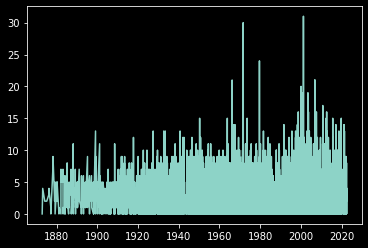

In [42]:
# Visualização da série temporal completa
plt.plot(st)

date
1872-12-31       0
1873-12-31       4
1874-12-31       2
1875-12-31       2
1876-12-31       7
              ... 
2018-12-31    1409
2019-12-31    1973
2020-12-31     428
2021-12-31    1781
2022-12-31     908
Freq: A-DEC, Name: home_score, Length: 151, dtype: int64

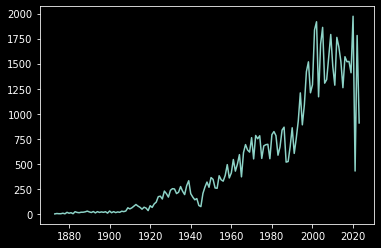

In [43]:
# Visualização por ano
ts_ano = st.resample('A').sum()
plt.plot(ts_ano)
ts_ano